In [11]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pdb
from Patch_ana import patch_pip
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
plt.style.use('classic')

% matplotlib inline
%load_ext autoreload
% autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
data= pd.read_csv('/data/Good data storage.csv')
data.head()

,File name,Age,Pip number,E-I,Reci,Artifact,IS100,Trial number before,Trial number after,Protocol,Elimi,Notes,Ptl_note
0,2016072704,27,3,0,0,0,1,"26,27,28,29","31,32,33,34,35",1,0,NaN,50Hz IE preonly
1,2017021501,30,3,0,0,0,2,"12,13","16,17",1,0,NaN,50Hz IE preonly
2,2016091403,30,2,0,0,0,1,"14,15","17,18",1,1,NaN,50Hz IE preonly
3,2017062202,24,1,0,0,0,1,"30,31,32","34,35",1,0,"No change, good data",50Hz IE preonly
4,2016072902,29,1,0,1,0,0,43,"45,46,47,48,49",1,0,NaN,50Hz IE preonly


In [3]:
data_am_asso_2Hz_reci = data[(data['Ptl_note']=='E_I_2Hz_Associ_AM251')&(data['Reci']==1)]

In [4]:
data_am_asso_2Hz_reci.drop(156, axis=0, inplace=True)
data_am_asso_2Hz_reci.drop(157, axis=0, inplace=True)
data_am_asso_2Hz_reci.drop(164, axis=0, inplace=True)

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [5]:
data_am_asso_2Hz_reci

,File name,Age,Pip number,E-I,Reci,Artifact,IS100,Trial number before,Trial number after,Protocol,Elimi,Notes,Ptl_note
154,2017121201,28,4,1,1,0,1,"41,42",44,21,5,Potentiation,E_I_2Hz_Associ_AM251
155,2017121501,30,2,1,1,0,1,7,9,21,0,Potentiation,E_I_2Hz_Associ_AM251
158,2017122701,30,3,1,1,1,1,"64,65,66","68,69,70,71,69,70,71",21,0,Potentiation,E_I_2Hz_Associ_AM251
159,2017122801,31,4,1,1,1,1,"16,17","19,20",21,11,Potentiation,E_I_2Hz_Associ_AM251
160,2017122902,32,3,1,1,0,1,"7,7","9,10,11,12",21,5,Potentiation,E_I_2Hz_Associ_AM251
161,2017122903,32,3,1,1,0,1,"27,28","30,31",21,0,Potentiation,E_I_2Hz_Associ_AM251
163,2018012902,30,2,1,1,0,1,"24,25,26",28,21,8,Potentiation,E_I_2Hz_Associ_AM251


<Container object of 3 artists>

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


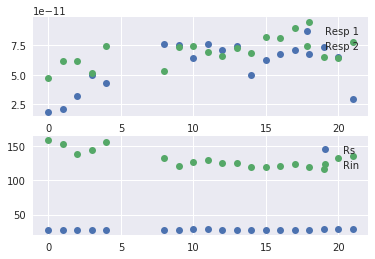

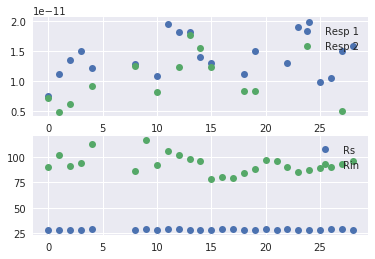

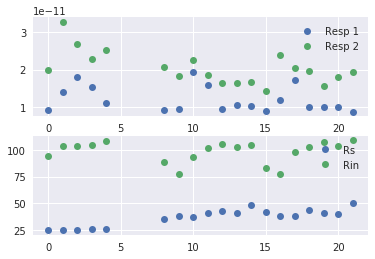

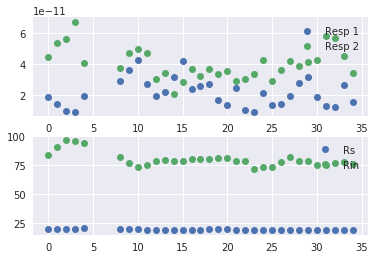

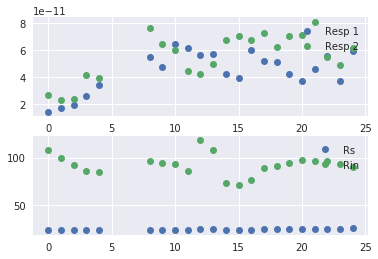

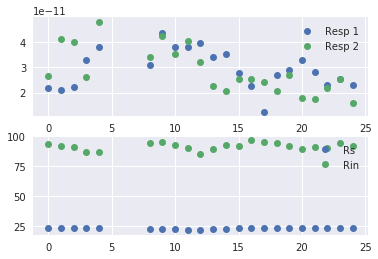

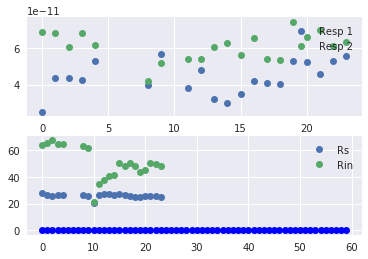

In [7]:
patch_pip.df_ana(data_am_asso_2Hz_reci,'/data/data_am_asso_2Hz_reci', end_ana=[20, 30, 20, 40, 25, 25, 23])
am_asso_2Hz_reci = pd.read_pickle('/data/data_am_asso_2Hz_reci')
ave_ptl_mean, ave_ptl_ste = patch_pip.sample_plot(am_asso_2Hz_reci)
plt.errorbar(x=np.arange(len(ave_ptl_mean)), y=ave_ptl_mean, yerr=ave_ptl_ste, fmt='bo')

In [8]:
am_asso_2Hz_reci['Before'].index

Int64Index([154, 155, 158, 159, 160, 161, 163], dtype='int64')

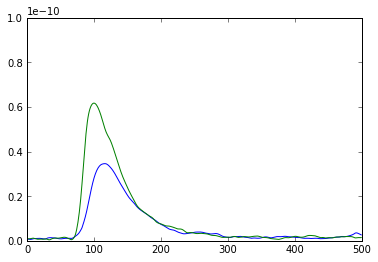

In [22]:
sample_id = 154
plt.plot(np.nanmean(np.vstack(am_asso_2Hz_reci['Before'].loc[sample_id]['trace_y1'])[:, :500], axis=0))
plt.plot(np.nanmean(np.vstack(am_asso_2Hz_reci['After'].loc[sample_id]['trace_y1'])[-5:,:500], axis=0))
plt.ylim([0, 1e-10])
with PdfPages('/data/Figure4_21.pdf') as pdf:
    pdf.savefig()

In [ ]:
elimi = np.array([20, 30, 20, 40, 25, 25, 23])
elimi_sr = pd.Series(elimi, index=am_asso_2Hz_reci.index)
am_asso_2Hz_reci['elimi']=elimi_sr

In [ ]:
# am_asso_2Hz_reci.to_pickle('/data/ana_am_asso_2')